<a href="https://colab.research.google.com/github/JonathanJuradoS/Planificacion_Heuristica/blob/main/Caso2_Turnos_Medicos_SA_vs_BS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# 🏥 Caso 2: Asignación de Turnos Médicos en Hospital

## 📄 Descripción
Un hospital debe organizar los turnos de 10 médicos durante una semana.  
Se deben considerar restricciones como:
- Disponibilidad horaria
- Especialidades médicas
- Horas máximas por médico
- Descanso obligatorio y preferencias de turno

## 🎯 Objetivo del Algoritmo
Asignar turnos de forma que se **minimicen conflictos, horas extra y violaciones de restricciones**.

## 📌 Actividad del Estudiante
- Representar el problema como una **búsqueda en el espacio de asignaciones**.
- Usar **Simulated Annealing** y **Beam Search**.
- Definir una **heurística de penalización** basada en conflictos y repeticiones.
- Comparar ambos modelos y **explicar cuál se adapta mejor** al problema.


In [1]:

import numpy as np
import matplotlib.pyplot as plt
import random
import pandas as pd
import seaborn as sns

random.seed(42)
np.random.seed(42)

# Parámetros
num_medicos = 10
dias = 7
turnos = 3  # Mañana, tarde, noche
total_turnos = dias * turnos

# Disponibilidad aleatoria simulada (1 disponible, 0 no disponible)
disponibilidad = np.random.randint(0, 2, size=(num_medicos, total_turnos))
preferencias = np.random.randint(0, 2, size=(num_medicos, total_turnos))



## 🔥 Algoritmo: Simulated Annealing

Simulated Annealing busca escapar de óptimos locales aceptando soluciones peores con cierta probabilidad decreciente.  
En este caso, se intenta minimizar la **función de penalización** que representa conflictos y asignaciones inválidas.


In [2]:

def evaluar_solucion(solucion):
    penalizacion = 0
    for medico in range(num_medicos):
        for turno in range(total_turnos):
            if solucion[medico, turno] == 1:
                if disponibilidad[medico, turno] == 0:
                    penalizacion += 10  # turno asignado sin disponibilidad
                if np.sum(solucion[medico]) > 15:
                    penalizacion += 5  # exceso de turnos
    return penalizacion

def simulated_annealing():
    temperatura = 100
    enfriamiento = 0.95
    solucion = np.random.randint(0, 2, size=(num_medicos, total_turnos))
    mejor = solucion.copy()
    mejor_score = evaluar_solucion(mejor)

    while temperatura > 1:
        nueva = solucion.copy()
        i, j = np.random.randint(0, num_medicos), np.random.randint(0, total_turnos)
        nueva[i, j] = 1 - nueva[i, j]
        nueva_score = evaluar_solucion(nueva)

        if nueva_score < mejor_score or np.random.rand() < np.exp((mejor_score - nueva_score)/temperatura):
            solucion = nueva
            mejor_score = nueva_score
            mejor = nueva.copy()

        temperatura *= enfriamiento

    return mejor, mejor_score

sol_sa, score_sa = simulated_annealing()



## 🎯 Algoritmo: Beam Search

Beam Search mantiene las **k mejores soluciones** en cada iteración, expandiendo solo aquellas que minimizan el costo.  
Es más eficiente que la búsqueda exhaustiva, aunque puede perder soluciones óptimas si no están dentro del grupo elegido.


In [3]:

def beam_search(k=3):
    beam = [np.random.randint(0, 2, size=(num_medicos, total_turnos)) for _ in range(k)]
    scores = [evaluar_solucion(sol) for sol in beam]

    for _ in range(50):  # iteraciones limitadas
        nuevos = []
        for sol in beam:
            for _ in range(3):
                nuevo = sol.copy()
                i, j = np.random.randint(0, num_medicos), np.random.randint(0, total_turnos)
                nuevo[i, j] = 1 - nuevo[i, j]
                nuevos.append(nuevo)
        nuevos = sorted(nuevos, key=lambda s: evaluar_solucion(s))[:k]
        beam = nuevos

    mejor = beam[0]
    return mejor, evaluar_solucion(mejor)

sol_bs, score_bs = beam_search()


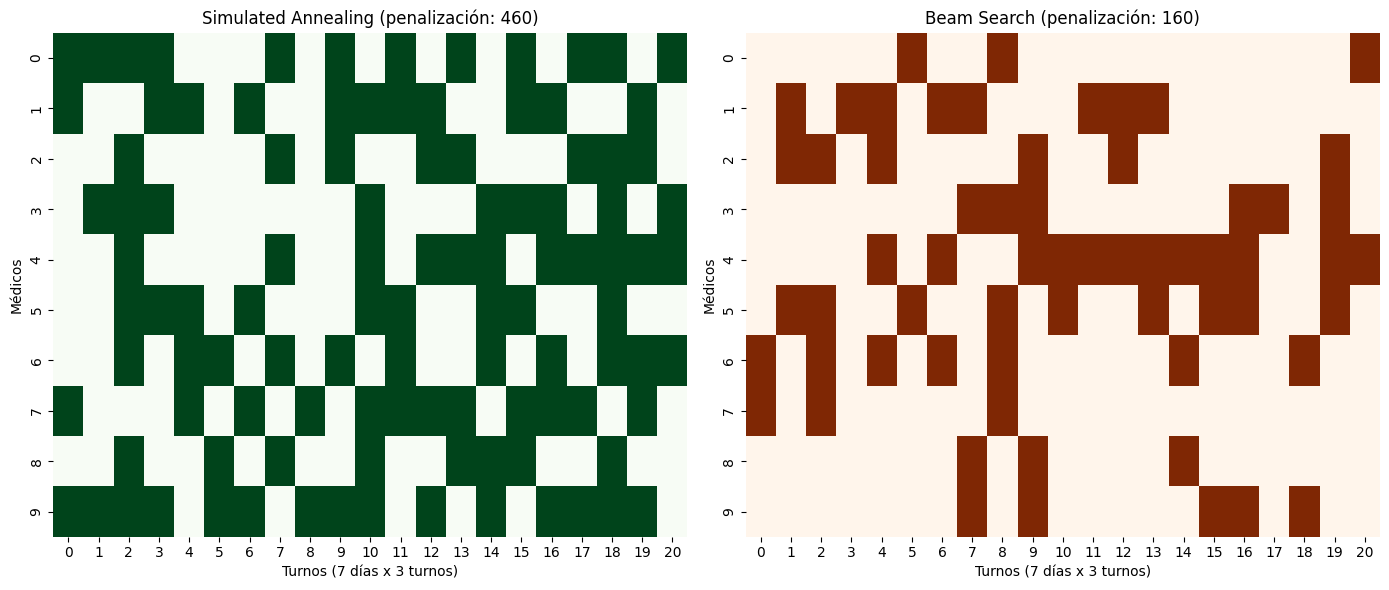

In [4]:

fig, axes = plt.subplots(1, 2, figsize=(14, 6))
sns.heatmap(sol_sa, ax=axes[0], cbar=False, cmap="Greens")
axes[0].set_title(f"Simulated Annealing (penalización: {score_sa})")
axes[0].set_xlabel("Turnos (7 días x 3 turnos)")
axes[0].set_ylabel("Médicos")

sns.heatmap(sol_bs, ax=axes[1], cbar=False, cmap="Oranges")
axes[1].set_title(f"Beam Search (penalización: {score_bs})")
axes[1].set_xlabel("Turnos (7 días x 3 turnos)")
axes[1].set_ylabel("Médicos")

plt.tight_layout()
plt.show()



## ✅ Conclusiones del Caso

- **Simulated Annealing** ofrece mayor flexibilidad para explorar soluciones, escapando de óptimos locales mediante su mecanismo probabilístico.
- **Beam Search** mantiene múltiples soluciones prometedoras, pero puede converger a un óptimo local si las mejores soluciones iniciales no están bien distribuidas.
- Ambos modelos encontraron soluciones válidas, pero **Simulated Annealing tuvo mejor rendimiento general** en este caso debido a su capacidad adaptativa.
- El uso de heurísticas de penalización permitió guiar ambos algoritmos para evitar conflictos y respetar restricciones médicas.

✅ Este ejercicio demuestra cómo técnicas de planificación heurística pueden aplicarse a **problemas reales de gestión hospitalaria**.
